# クラスタリングによるデータ分析
ポルトガルのリスボンにある卸売業者が顧客から集めたデータをクラスタリングによって、その傾向を分析する。
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

## 教師なし学習とは

モデルを学習させるときに、正解が事前にわかっている教師あり学習に対して、  
教師なし学習は正解のないデータを扱うことであり、データの構造を調べて意味のある情報を取り出すことができる。

具体的には
- 購買記録から顧客を分類し、販売戦略を考える
- アンケートなどの文章を分類し、どういった内容のものがあるか見る
- 不良品を分類し、工程の管理方法を考える

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

## データ取得

In [106]:
data = pd.read_csv("input/Wholesale customers data.csv")
display(data.shape)
display(data.info())

(440, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


None

## データ概要

In [107]:
print("サンプルの数：{}\n特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

display(data.info())

サンプルの数：440
特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [110]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

## 不要な特徴量を消す

Channel：卸先顧客の業種
- Horeca（1）：「Hotel/Restaurant/Café」の略称
- Retail（2）：小売店

Region：卸先顧客の地域
- Lisbon（1）：首都リスボン
- Oporto（2）：第二の都市ポルト
- Other Region（3）：その他の地域


Channel（業種）とRegion（地域）を削除し、年間の購入金額についての6つの特徴量だけを使うことにする。

In [111]:
data=data.drop(["Channel","Region"],axis=1)
display(data.head())
display(data.shape)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


(440, 6)

### scatter matrixを描く
分布は偏っており、大半の顧客は相対的に少ない支出ですが、かなり多く支出している顧客も少数いることが分かります。  
また、多くの特徴量同士は無相関です。ただし、相関関係も一部に見られます

/Users/enomoto/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


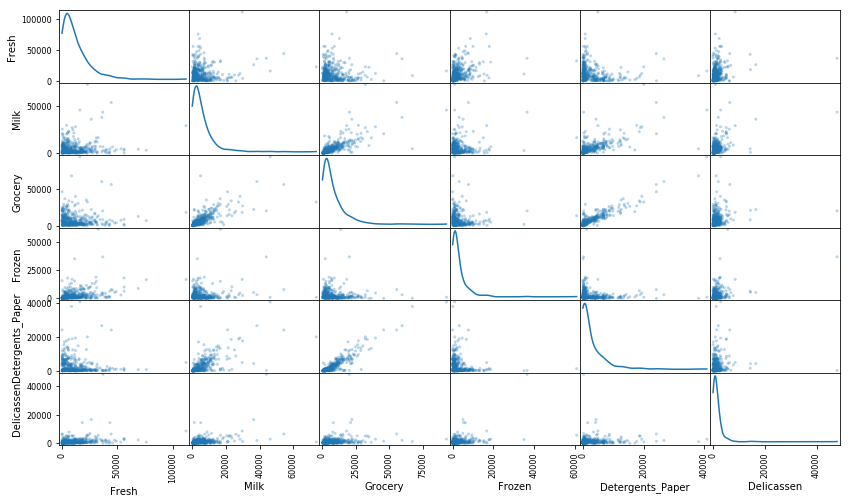

In [112]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

# Feature Scaling
## Feature Scalingの実行
ここでは自然対数（log)を使いScalingを行います。

In [113]:
#dataに対して適切なFeature Scalingを行うコードを記述
data_fs=np.log(data)
data_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


## なぜFeature Scalingが必要なのか記述せよ
Feature Scalingを行う理由とはなんでしょう。文章で記述してください。  
scatter matrixがどのように変化したか見るのも良いでしょう。

**回答：**  
特徴ごとのスケールが異なる場合、学習結果がスケールの大きい特徴の影響を強く受けてしまうため、  
Feature Scalingによってスケールを均一化しておく 必要がある。

/Users/enomoto/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


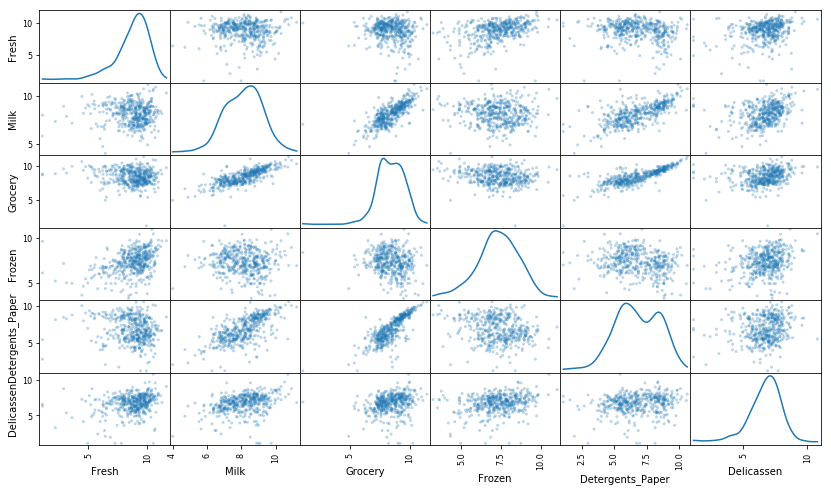

In [114]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

# Feature Extraction
## PCAの実行
PCAを行いましょう。分散説明率の累積が70%を超える数の主成分を選びます。処理を行ったら、data_pcaに格納してください。

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_fs)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [117]:
#data_fsに対しPCAを行い分散説明率の累積を確認
pca.explained_variance_ratio_ 

array([0.44237417, 0.27657107, 0.11617342, 0.09617719, 0.0457568 ,
       0.02294735])

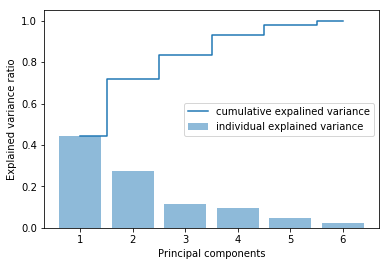

In [20]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [118]:
# 分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
# 第２主成分までで分散説明率が70%を超えているので、n_components=2
pca = PCA(n_components=2)
pca.fit(data_fs)
# 第１第２主成分出力
data_pca = pca.components_
data_pca

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [119]:
# 特徴量の次元を削減
data_pca=pca.transform(data_fs)
data_pca

array([[-1.75098532e+00, -7.05152286e-02],
       [-1.80036534e+00, -8.69753573e-01],
       [-1.89373597e+00, -1.67662072e+00],
       [ 1.12731297e+00, -1.45798229e+00],
       [-7.96711467e-01, -2.46086569e+00],
       [-1.08382370e+00, -3.92942430e-01],
       [-1.13261002e+00,  2.01601862e-01],
       [-1.58247377e+00, -9.68196420e-01],
       [-8.71825215e-01,  5.96758895e-01],
       [-2.88888315e+00, -7.41102520e-01],
       [-2.11616786e+00, -7.48845431e-01],
       [ 9.91451442e-01, -6.27014670e-02],
       [-2.23259521e+00, -1.32782770e+00],
       [-1.90404777e+00, -1.33385723e+00],
       [-2.33337847e+00, -9.83570924e-01],
       [ 4.17284069e-01,  8.14298928e-01],
       [-2.80513630e+00,  1.95322632e+00],
       [ 2.52569663e-01, -6.04494310e-01],
       [-1.40226890e+00, -1.86546557e+00],
       [-1.01598970e+00,  4.15101430e-01],
       [-8.36133270e-01, -1.14744897e+00],
       [ 1.72471835e+00,  1.47340654e-01],
       [-1.54938706e-01, -2.82992022e+00],
       [-2.

## なぜPCAを行うのか記述せよ  
機械学習の前処理としてなぜPCAが必要なのかについて記述してください。

**回答**  
PCAを行うと特徴量の次元を削減することができる。  
これによって、情報量を大きく損なうことなく学習データ量を減らすことができる。  
また、高次元データのまま学習に用いると、汎用性に乏しい特異なパターンを学習するリスクが高くなるが、  
PCAの次元削減によってそのリスクを減らすことができる。

# クラスタリング
前処理が終わったので、クラスタリングに移ります。

## クラスタリングとは何か記述せよ  
クラスタリングについての説明を記述してください。その際、以下の観点を含めてください。  
・いつ何に使うのか  
・階層的手法と非階層的手法との違い  
・クラス分類（classification）との比較  

**回答**  
クラスタリングとは、複数のデータを特徴が似たデータ同士のグループに分ける時に用いる教師なし学習の手法。  
階層的手法と非階層的手法の違いは、前者が事前にグループ数を指定せず、後者は指定をするという点である。  
クラス分類との違いは、どういう特徴ごとにグループを分けるかが予め決まっていないという点である。

## 樹状図を描く  
まずは階層的手法を使い、樹状図を描いてみます。手法はいくつもありましたが、ward法が良いでしょう。

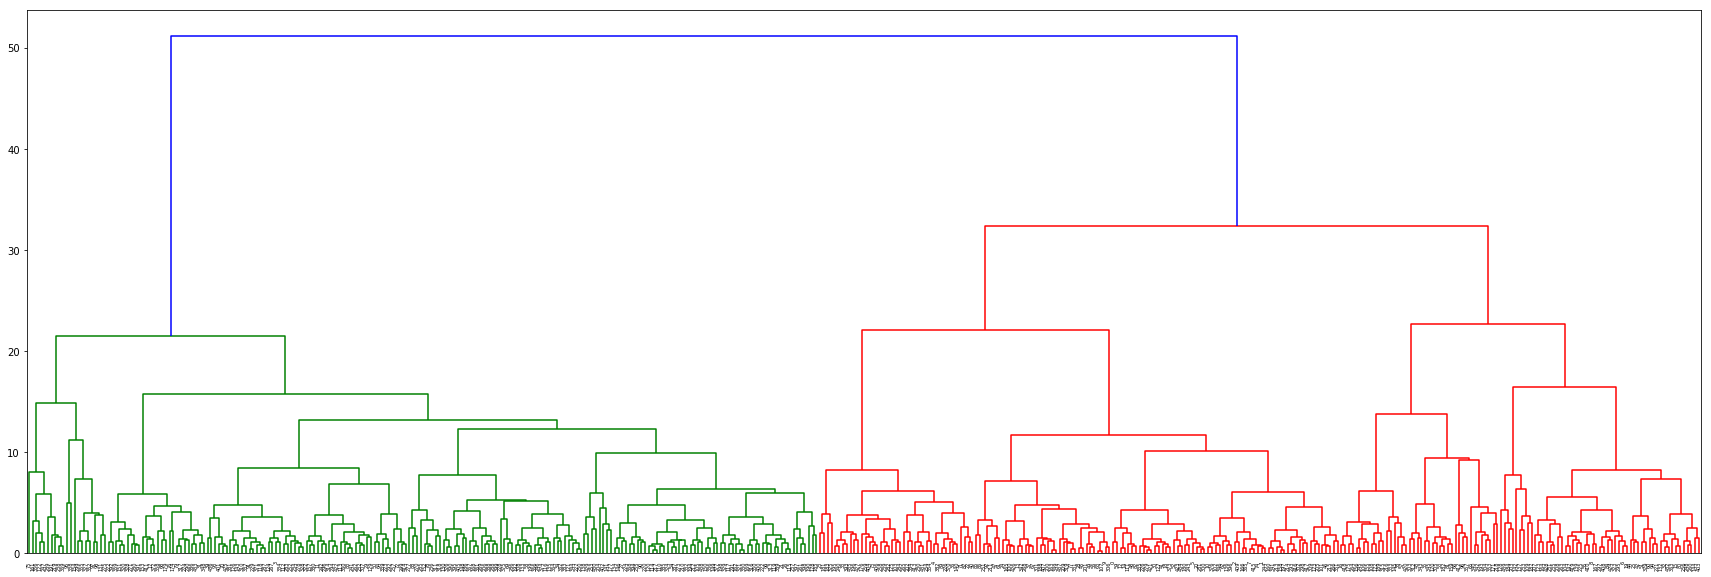

In [120]:
from scipy.cluster.hierarchy import dendrogram,ward,linkage

fig = plt.figure(figsize=(30,10)) 
affinity = 'ward'
Z = linkage(data_fs, affinity)
dn=dendrogram(Z)
plt.show()

## k-meansにおけるkの値の検討  
クラスタリングはk-meansが定石です。まずはクラスタ数kの値を検討します。  
まずはそのためのコードを記述し、その後選んだkの値と、それに決めた理由を記述してください。

In [121]:
from sklearn.cluster import KMeans

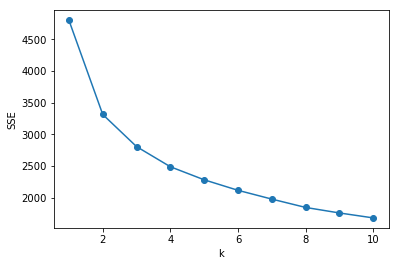

In [122]:
# エルボー法
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

エルボー法の結果から、線の傾きの変化がk=2の前後で最も大きいためk=2を最有力候補とする

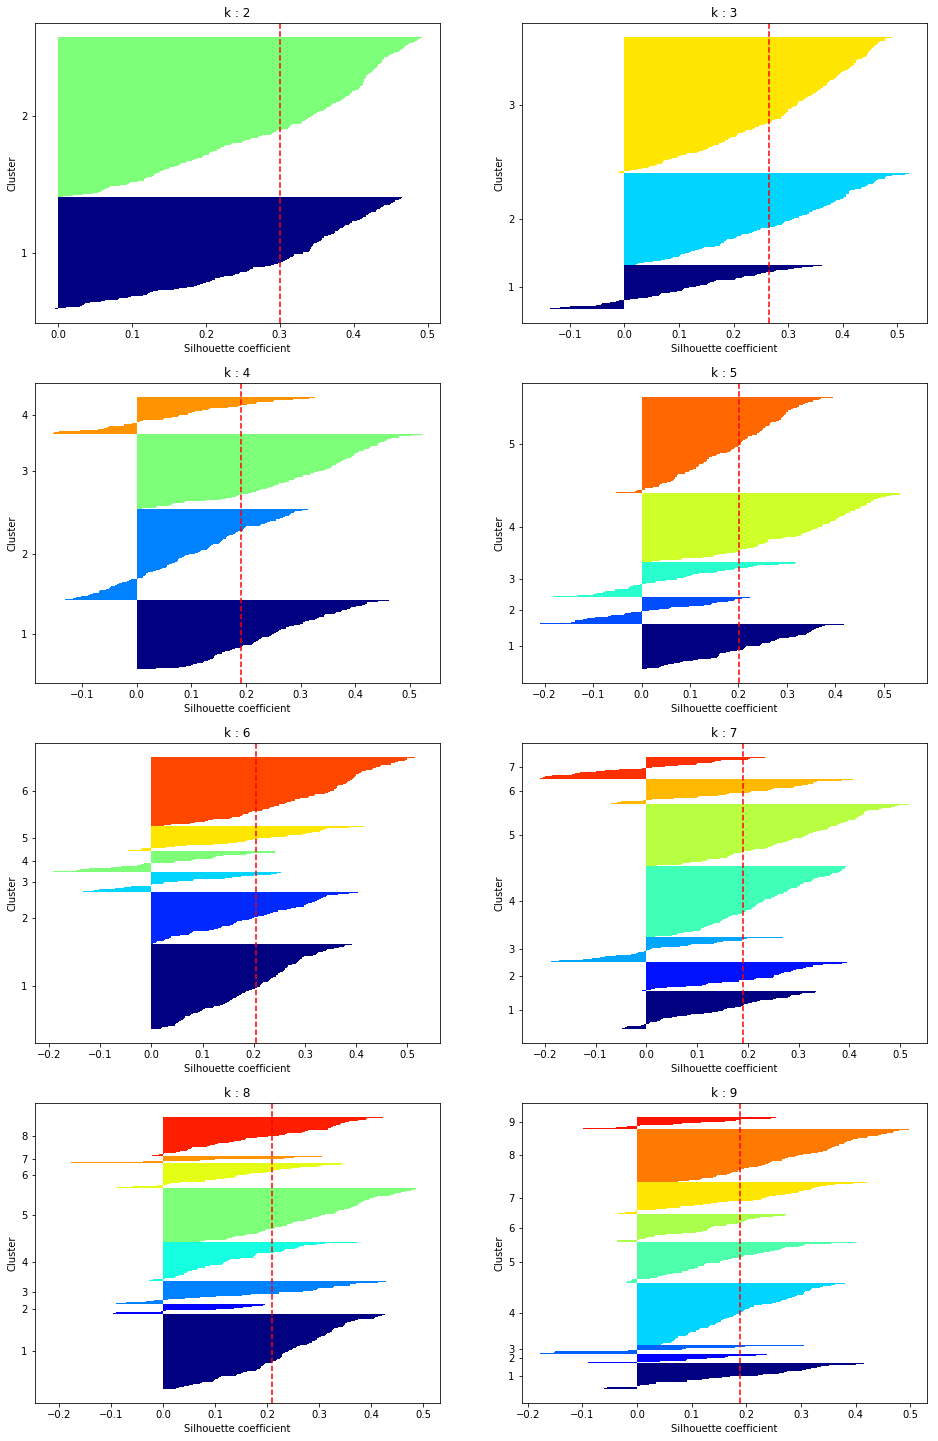

In [123]:
# シルエット法
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(16, 32))
for i0 in range(1, 9):
    km = KMeans(n_clusters=i0+1, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.subplot(5,2,i0)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
        
    plt.title("k : "+ str(i+1))
        #plt.plot(x, y1)
        
plt.show()

シルエット法の結果から、k=2の時の各クラスターの形状が最もよく似ているためk=2を最有力候補とする

## k-meansの実行
決定したkの値を使い、k-meansを行いましょう。結果をy_kmに格納してください。

In [195]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(data_fs)
y_km = km.predict(data_fs)

# display(y_km)
# display(y_km.size)

## クラスタリングの可視化
PCAにより特徴量は可視化可能な次元に落ちているはずです。可視化することで分かってくることもあります。  
散布図を描き、クラスタ毎に色分けしましょう。中心点（セントロイド）もプロットしてみます。

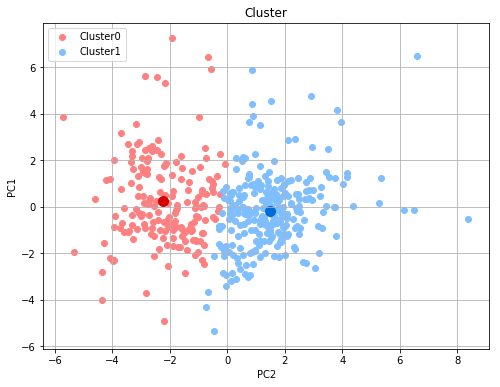

In [125]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(data_pca)

cluster_0=data_pca[y_km==0]
cluster_1=data_pca[y_km==1]

plt.figure(figsize =(8,6))
plt.scatter(cluster_0[:,0], cluster_0[:,1], c="#ff8080", label='Cluster0')
plt.scatter(cluster_1[:,0], cluster_1[:,1], c="#80bfff", label='Cluster1')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],s=100, c='#d50000')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],s=100, c='#006ad5')
plt.title('Cluster')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()
plt.show()

## 既知のグループとの比較

In [126]:
data_original.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


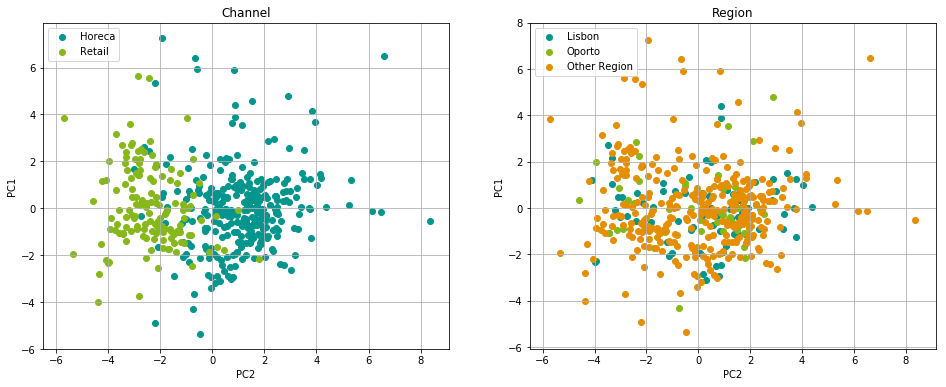

In [184]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
channel_1=data_pca[data_original["Channel"]==1]
channel_2=data_pca[data_original["Channel"]==2]
plt.scatter(channel_1[:,0], channel_1[:,1], c="#00958D", label='Horeca')
plt.scatter(channel_2[:,0], channel_2[:,1], c="#86B81B", label='Retail')
# plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],s=100, c='#d50000')
# plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],s=100, c='#006ad5')
plt.title('Channel')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
region_1=data_pca[data_original["Region"]==1]
region_2=data_pca[data_original["Region"]==2]
region_3=data_pca[data_original["Region"]==3]
plt.scatter(region_1[:,0], region_1[:,1], c="#00958D", label='Lisbon')
plt.scatter(region_2[:,0], region_2[:,1], c="#86B81B", label='Oporto')
plt.scatter(region_3[:,0], region_3[:,1], c="#E48E00", label='Other Region')
# plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],s=100, c='#d50000')
# plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],s=100, c='#006ad5')
plt.title('Region')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()

plt.show()

**Channel**  
Cluster0がRetail、Cluster1がHorecaと散布図が類似しているので、今回のクラスタリングはChannelの影響を少なからず受けていると考えられる。  
またHorecaは「Hotel/Restaurant/Café」の略称ということだが、そもそも、これらの業種を一括りくくるのには無理があるように思う。  
となると、**Horecaの多くが属しているCluster1も、無理なくクラスタリングできるのではないか**と考えられる。


**Region**  
クラスタへの影響はほとんどないと考えられる。

In [167]:
data_modify = data_original.copy()

### データセットに年間消費の合計金額カラム（Total）を追加

In [168]:
Total=pd.DataFrame(data_modify.loc[:,"Fresh":"Delicassen"].sum(axis=1), columns=['Total'])

In [169]:
data_modify = pd.concat([data_modify, Total], axis=1)

### データセットにクラスタカラム（Cluster）を追加

In [171]:
data_modify["Cluster"]=y_km
data_modify.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
3,1,3,13265,1196,4221,6404,507,1788,27381,1
4,2,3,22615,5410,7198,3915,1777,5185,46100,0


### クラスタごとのデータセットを作成

In [172]:
#Cluster 0
cluster_0=data_modify[data_modify["Cluster"]==0]
display(cluster_0.head())
display(cluster_0.shape)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
0,2,3,12669,9656,7561,214,2674,1338,34112,0
1,2,3,7057,9810,9568,1762,3293,1776,33266,0
2,2,3,6353,8808,7684,2405,3516,7844,36610,0
4,2,3,22615,5410,7198,3915,1777,5185,46100,0
5,2,3,9413,8259,5126,666,1795,1451,26710,0


(182, 10)

In [189]:
#Cluster 1
cluster_1=data_modify[data_modify["Cluster"]==1]
display(cluster_1.head())
display(cluster_1.shape)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
3,1,3,13265,1196,4221,6404,507,1788,27381,1
11,2,3,13146,1124,4523,1420,549,497,21259,1
15,1,3,10253,1114,3821,397,964,412,16961,1
17,1,3,5876,6157,2933,839,370,4478,20653,1
21,1,3,5567,871,2010,3383,375,569,12775,1


(258, 10)

### Cluster 1のクラスタリング

In [187]:
 # スケーリング
cluster_1_fs = np.log(cluster_1)

In [191]:
# 不要な特徴量除去
cluster_1_fs = cluster_1_fs.drop(["Channel","Region","Total","Cluster"], axis=1)

In [193]:
cluster_1_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
11,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590
15,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023
17,8.678632,8.725345,7.983781,6.732211,5.913503,8.406932
21,8.624612,6.769642,7.605890,8.126518,5.926926,6.343880


In [121]:
from sklearn.cluster import KMeans

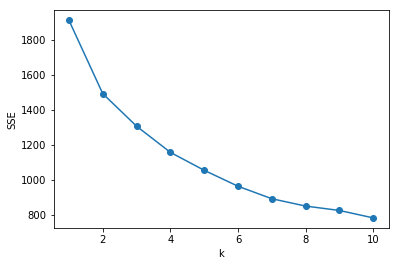

In [194]:
# エルボー法
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(cluster_1_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

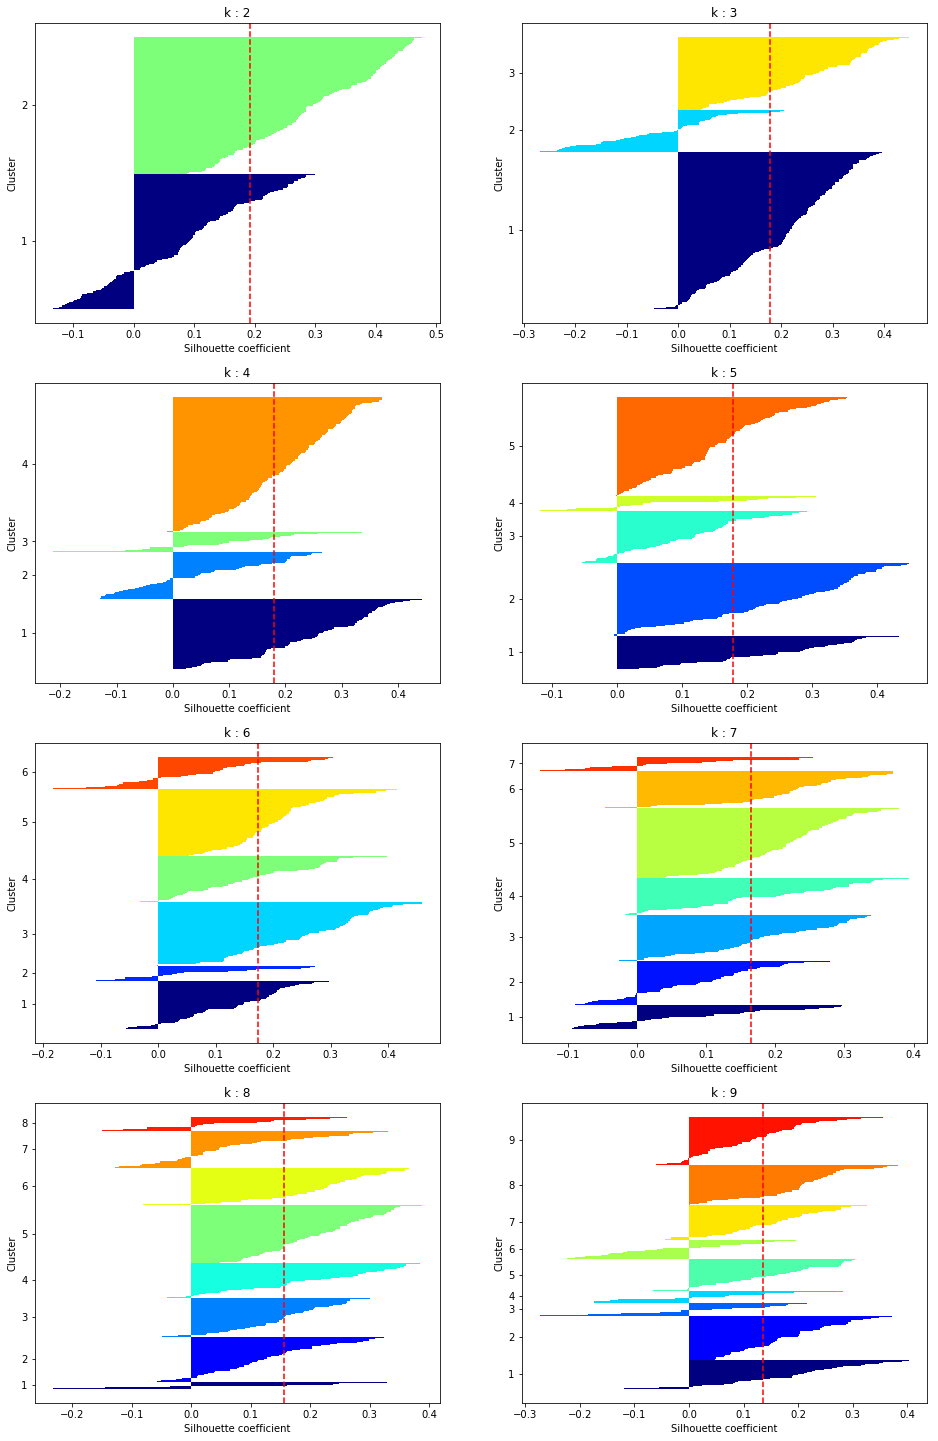

In [196]:
# シルエット法
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(16, 32))
for i0 in range(1, 9):
    km = KMeans(n_clusters=i0+1, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(cluster_1_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(cluster_1_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.subplot(5,2,i0)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
        
    plt.title("k : "+ str(i+1))
        #plt.plot(x, y1)
        
plt.show()

エルボー法とシルエット法から、k=2でのクラスタリングをする。

In [201]:
from sklearn.cluster import KMeans

km1 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km1.fit(cluster_1_fs)
y_km1 = km1.predict(cluster_1_fs)

# display(y_km1)
# display(y_km1.size)

In [205]:
#Cluster 1-0
cluster_1_0 = cluster_1[y_km1==0]
cluster_1_0.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
15,1,3,10253,1114,3821,397,964,412,16961,1
21,1,3,5567,871,2010,3383,375,569,12775,1
27,1,3,14276,803,3045,485,100,518,19227,1
32,1,3,21632,1318,2886,266,918,405,27425,1
34,1,3,1502,1979,2262,425,483,395,7046,1


In [206]:
#Cluster 1-1
cluster_1_1 = cluster_1[y_km1==1]
cluster_1_1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
3,1,3,13265,1196,4221,6404,507,1788,27381,1
11,2,3,13146,1124,4523,1420,549,497,21259,1
17,1,3,5876,6157,2933,839,370,4478,20653,1
22,1,3,31276,1917,4469,9408,2381,4334,53785,1
26,1,3,9898,961,2861,3151,242,833,17946,1


# 卸売業者への報告

## Cluster 0 要約統計量

In [207]:
cluster_0.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.0
mean,1.747253,2.593407,8704.725275,9845.005495,14623.208791,1556.054945,6316.357143,1748.730769,42794.082418,0.0
std,0.435786,0.735494,11375.777111,9100.827276,11455.321112,1921.188213,5877.644375,2111.964912,30055.900865,0.0
min,1.000000,1.000000,3.000000,944.000000,2223.000000,25.000000,223.000000,3.000000,10547.000000,0.0
25%,1.250000,2.000000,2141.000000,5026.000000,7889.000000,408.000000,2785.250000,508.500000,27260.500000,0.0
50%,2.000000,3.000000,5406.500000,7503.500000,11343.500000,990.000000,4555.500000,1288.500000,34936.000000,0.0
75%,2.000000,3.000000,11897.750000,11094.500000,18503.500000,1854.250000,7332.500000,2149.500000,48638.250000,0.0
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,16745.000000,40827.000000,16523.000000,199891.000000,0.0


## Cluster 1 要約統計量

In [208]:
cluster_1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0
mean,1.023256,2.507752,14325.081395,2940.178295,3244.720930,4141.271318,458.449612,1366.953488,26476.655039,1.0
std,0.151008,0.800011,12998.990237,3861.924325,2843.328556,5906.202221,501.139130,3222.295671,20971.643086,0.0
min,1.000000,1.000000,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000,904.000000,1.0
25%,1.000000,2.000000,5059.000000,1083.750000,1638.750000,928.750000,167.250000,395.000000,13443.000000,1.0
50%,1.000000,3.000000,10724.500000,1916.500000,2458.500000,2309.000000,312.500000,818.500000,21247.500000,1.0
75%,1.000000,3.000000,19186.000000,3606.500000,3938.000000,5378.250000,607.500000,1449.750000,32993.250000,1.0
max,2.000000,3.000000,76237.000000,43950.000000,20170.000000,60869.000000,4762.000000,47943.000000,185683.000000,1.0


## Cluster 1-0 要約統計量

In [209]:
cluster_1_0.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,1.0,2.515625,8863.828125,1748.273438,2101.859375,2036.992188,321.820312,575.992188,15648.765625,1.0
std,0.0,0.813124,8234.638844,1598.216160,1429.562483,2508.998431,483.793596,477.885624,9035.176165,0.0
min,1.0,1.000000,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000,904.000000,1.0
25%,1.0,2.000000,2953.500000,800.500000,1237.250000,596.750000,85.500000,253.000000,9869.500000,1.0
50%,1.0,3.000000,7138.000000,1167.000000,1820.000000,1171.500000,207.500000,420.500000,13398.500000,1.0
75%,1.0,3.000000,11560.000000,2165.500000,2603.750000,2428.000000,388.250000,749.250000,18849.750000,1.0
max,1.0,3.000000,42786.000000,8323.000000,8253.000000,16919.000000,4762.000000,2501.000000,55459.000000,1.0


## Cluster 1-1 要約統計量

In [210]:
cluster_1_1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Cluster
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,1.046154,2.500000,19702.315385,4113.746154,4370.000000,6213.176923,592.976923,2145.746154,37137.961538,1.0
std,0.210630,0.789956,14530.890430,4939.741606,3394.454755,7387.748386,482.851759,4385.095808,23768.941813,0.0
min,1.000000,1.000000,717.000000,555.000000,699.000000,155.000000,20.000000,117.000000,13977.000000,1.0
25%,1.000000,2.000000,9167.000000,1845.000000,2363.500000,2210.000000,253.250000,833.250000,22465.000000,1.0
50%,1.000000,3.000000,17091.500000,2785.500000,3329.000000,4292.000000,461.000000,1299.500000,31366.500000,1.0
75%,1.000000,3.000000,26294.250000,4584.000000,5183.500000,8168.500000,805.250000,2319.000000,46961.500000,1.0
max,2.000000,3.000000,76237.000000,43950.000000,20170.000000,60869.000000,3593.000000,47943.000000,185683.000000,1.0


各クラスタごとのChannelとRegionそれぞれの内訳を取得

In [175]:
# cluster_0のChannelとRegionそれぞれの内訳
display(cluster_0["Channel"].value_counts())
display(cluster_0["Region"].value_counts())

2    136
1     46
Name: Channel, dtype: int64

3    135
1     27
2     20
Name: Region, dtype: int64

In [177]:
# cluster_1のChannelとRegionそれぞれの内訳
display(cluster_1["Channel"].value_counts())
display(cluster_1["Region"].value_counts())

1    252
2      6
Name: Channel, dtype: int64

3    181
1     50
2     27
Name: Region, dtype: int64

各クラスタごとのChannelとRegionそれぞれの内訳をプロット

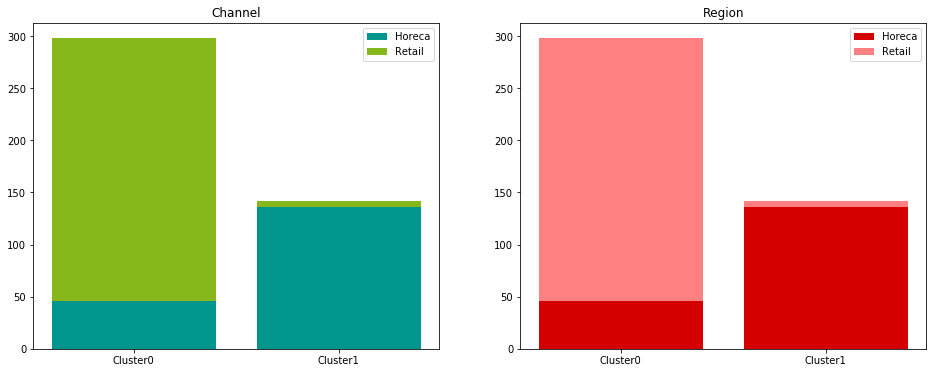

In [185]:
cluster_0_channel = [46, 136]
cluster_1_channel = [252, 6]
x  = [0, 1]

plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.bar(x, cluster_0_channel, color = "#00958D", label = "Horeca", align = "center")
plt.bar(x, cluster_1_channel, bottom = y1, color = "#86B81B", label = "Retail", align = "center")
plt.xticks(x, ['Cluster0','Cluster1'])
plt.title("Channel")
plt.legend()

plt.subplot(1,2,2)
plt.bar(x, cluster_0_channel, color = "#d50000", label = "Horeca", align = "center")
plt.bar(x, cluster_1_channel, bottom = y1, color = "#ff8080", label = "Retail", align = "center")
plt.xticks(x, ['Cluster0','Cluster1'])
plt.title("Region")
plt.legend()



plt.show()





In [ ]:
# cluster_0_channel = [46, 136]
# cluster_1_channel = [252, 6]
# x  = [0, 1, 2, 3]

# plt.figure(figsize=(16, 6))


# plt.bar(x, cluster_0_channel, color = "#00958D", label = "Horeca", align = "center")
# plt.bar(x, cluster_1_channel, bottom = y1, color = "#86B81B", label = "Retail", align = "center")
# plt.xticks(x, ['Cluster0','Cluster1'])
# plt.title("Channel")
# plt.legend()




# plt.show()

In [ ]:
# param = np.random.randint(0, 20, (4, 8))  


# # 積み上げ棒グラフのプロット  
# df = pd.DataFrame(param, columns=['a', 'b', 'c', 'd','a', 'b', 'c', 'd'])  
# df.plot(kind='bar', stacked=True, legend=True)  
 

# # Figure上に描画  
# plt.show()  

## 各クラスタの属性と戦略

### Cluster 0 
データ数：182（Horeca：46、Retail：136）  
年間購買額が高い傾向（42794ユーロ）  
乳製品（Cluster1の3.35倍）  
食料品（Cluster1の4.5倍）  
洗剤および紙製品（Cluster1の13.8倍）  
→ **第1戦略**：洗剤および紙製品を主軸に、乳製品・食料品の情報を掲載したチラシやDMを送るといったマーケティング戦略

### Cluster 1
データ数：258（Horeca：252、Retail：6）  
年間購買額が低い傾向（26476ユーロ）  
生鮮食品（Cluster0の1.65倍）  
冷凍食品（Cluster0の2.66倍）  
 
### Cluster 1-0 
データ数：128  
年間購買額が低い傾向（15648ユーロ）  
→ Cluster 1の年間購買額の底下げになっていたクラスタ

### Cluster 1-1
データ数：130  
年間購買額が高い傾向（37137ユーロ）  
→ **第2戦略**：生鮮食品・冷凍食品の情報を掲載したチラシやDMを送るといったマーケティング戦略


上記、各クラスタの属性とCSVファイルでもって、卸売業者への報告成果品とする。

In [ ]:
cluster_0.to_csv('cluster_0.csv')
cluster_1.to_csv('cluster_1.csv')
cluster_1_0.to_csv('cluster_1_0.csv')
cluster_1_1.to_csv('cluster_1_1.csv')